In [1]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import pickle
import seaborn as sns
import datetime as dt
from model import StockEnv,get_scaler, play_one_episode, LinearModel, DQNAgent
from tqdm.notebook import tqdm
import pyfolio as pf
%matplotlib inline

C:\Users\User\anaconda3\envs\MyDjango\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


Stock name: AVB
Start: 2013-02-19 00:00:00, End: 2020-12-31 00:00:00
Training data: 1227 
Tsesting data: 756 


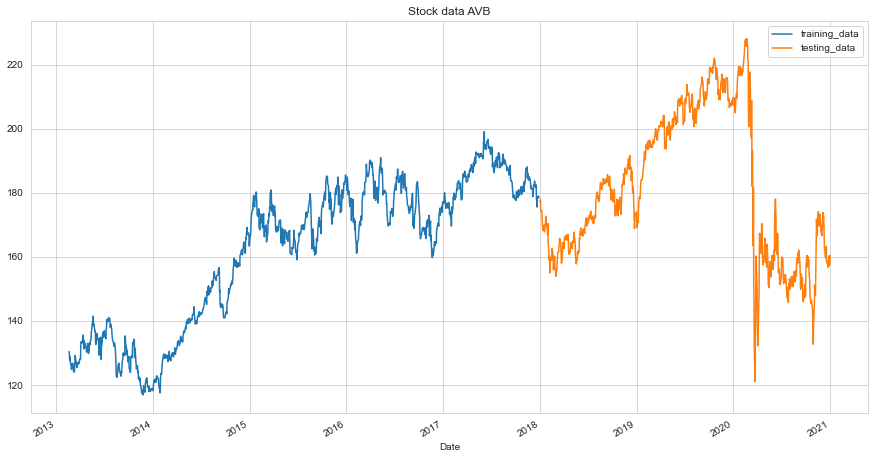

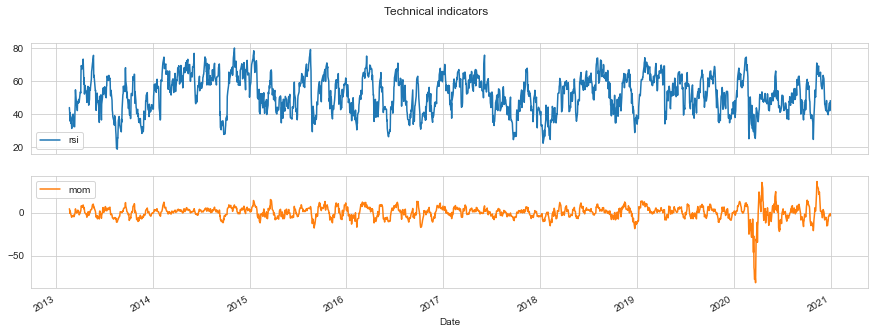

In [2]:
stock_name = 'avb'.upper()
industry = 'Real estate'
stock_data = pd.read_csv(f'../train_test_data/{stock_name}.csv', index_col=['Date'], parse_dates=True)

train_data = stock_data.loc[:'2018-01-01']
test_data = stock_data.loc['2018-01-01':]

print(f'Stock name: {stock_name}')
print(f'Start: {stock_data.index[0]}, End: {stock_data.index[-1]}')
print(f'Training data: {len(train_data)} ')
print(f'Tsesting data: {len(test_data)} ')

sns.set_style('whitegrid')
train_data['Adj Close'].plot(label='training_data', figsize=(15,8));
test_data['Adj Close'].plot(label='testing_data');
plt.title('Stock data '+ stock_name)
plt.legend();
plt.show()

stock_data[['rsi', 'mom']].plot(subplots=True, figsize=(15,5), title='Technical indicators');
plt.show()




In [3]:
num_episodes = 2000
batch_size = 32
capital = 1000
data = stock_data['Adj Close'].values
n_timesteps = data.shape[0]


env = StockEnv(train_data, capital)
state_size = env.state_dim
action_size = 2
agent = DQNAgent(state_size, action_size)
scaler = get_scaler(env)

  0%|          | 0/2000 [00:00<?, ?it/s]

episode: 1/2000, episode end value: 1201.43, duration: 0:00:00.209373
episode: 2/2000, episode end value: 1209.23, duration: 0:00:00.195435
episode: 3/2000, episode end value: 1178.37, duration: 0:00:00.198322
episode: 4/2000, episode end value: 1200.01, duration: 0:00:00.219236
episode: 5/2000, episode end value: 1205.23, duration: 0:00:00.224766
episode: 6/2000, episode end value: 1240.71, duration: 0:00:00.204763
episode: 7/2000, episode end value: 1179.67, duration: 0:00:00.220049
episode: 8/2000, episode end value: 1197.55, duration: 0:00:00.224053
episode: 9/2000, episode end value: 1199.29, duration: 0:00:00.241054
episode: 10/2000, episode end value: 1242.06, duration: 0:00:00.237054
episode: 11/2000, episode end value: 1216.72, duration: 0:00:00.214050
episode: 12/2000, episode end value: 1191.70, duration: 0:00:00.236056
episode: 13/2000, episode end value: 1195.63, duration: 0:00:00.257787
episode: 14/2000, episode end value: 1253.15, duration: 0:00:00.213048
episode: 15/200

episode: 117/2000, episode end value: 1222.82, duration: 0:00:00.236535
episode: 118/2000, episode end value: 1179.06, duration: 0:00:00.213971
episode: 119/2000, episode end value: 1241.90, duration: 0:00:00.204635
episode: 120/2000, episode end value: 1196.38, duration: 0:00:00.191867
episode: 121/2000, episode end value: 1256.26, duration: 0:00:00.197616
episode: 122/2000, episode end value: 1232.31, duration: 0:00:00.205087
episode: 123/2000, episode end value: 1179.17, duration: 0:00:00.198063
episode: 124/2000, episode end value: 1181.83, duration: 0:00:00.228792
episode: 125/2000, episode end value: 1218.91, duration: 0:00:00.208950
episode: 126/2000, episode end value: 1187.93, duration: 0:00:00.213366
episode: 127/2000, episode end value: 1201.63, duration: 0:00:00.237134
episode: 128/2000, episode end value: 1246.41, duration: 0:00:00.196000
episode: 129/2000, episode end value: 1198.51, duration: 0:00:00.243351
episode: 130/2000, episode end value: 1228.54, duration: 0:00:00

episode: 231/2000, episode end value: 1188.54, duration: 0:00:00.240261
episode: 232/2000, episode end value: 1221.02, duration: 0:00:00.243010
episode: 233/2000, episode end value: 1175.28, duration: 0:00:00.241952
episode: 234/2000, episode end value: 1205.08, duration: 0:00:00.239244
episode: 235/2000, episode end value: 1204.97, duration: 0:00:00.259331
episode: 236/2000, episode end value: 1207.23, duration: 0:00:00.251531
episode: 237/2000, episode end value: 1193.88, duration: 0:00:00.245549
episode: 238/2000, episode end value: 1204.71, duration: 0:00:00.290131
episode: 239/2000, episode end value: 1190.17, duration: 0:00:00.249063
episode: 240/2000, episode end value: 1216.97, duration: 0:00:00.257432
episode: 241/2000, episode end value: 1220.99, duration: 0:00:00.264706
episode: 242/2000, episode end value: 1189.72, duration: 0:00:00.245325
episode: 243/2000, episode end value: 1190.09, duration: 0:00:00.264339
episode: 244/2000, episode end value: 1225.95, duration: 0:00:00

episode: 345/2000, episode end value: 1220.40, duration: 0:00:00.290287
episode: 346/2000, episode end value: 1188.70, duration: 0:00:00.288916
episode: 347/2000, episode end value: 1219.08, duration: 0:00:00.284169
episode: 348/2000, episode end value: 1209.48, duration: 0:00:00.257301
episode: 349/2000, episode end value: 1185.16, duration: 0:00:00.302662
episode: 350/2000, episode end value: 1192.32, duration: 0:00:00.262828
episode: 351/2000, episode end value: 1247.96, duration: 0:00:00.258204
episode: 352/2000, episode end value: 1191.15, duration: 0:00:00.295688
episode: 353/2000, episode end value: 1254.35, duration: 0:00:00.265061
episode: 354/2000, episode end value: 1195.74, duration: 0:00:00.263718
episode: 355/2000, episode end value: 1205.97, duration: 0:00:00.296050
episode: 356/2000, episode end value: 1211.35, duration: 0:00:00.309954
episode: 357/2000, episode end value: 1216.97, duration: 0:00:00.305114
episode: 358/2000, episode end value: 1223.47, duration: 0:00:00

episode: 459/2000, episode end value: 1196.46, duration: 0:00:00.339221
episode: 460/2000, episode end value: 1190.49, duration: 0:00:00.337188
episode: 461/2000, episode end value: 1191.08, duration: 0:00:00.305907
episode: 462/2000, episode end value: 1204.22, duration: 0:00:00.321153
episode: 463/2000, episode end value: 1190.97, duration: 0:00:00.389089
episode: 464/2000, episode end value: 1220.36, duration: 0:00:00.388632
episode: 465/2000, episode end value: 1213.58, duration: 0:00:00.305994
episode: 466/2000, episode end value: 1194.75, duration: 0:00:00.319081
episode: 467/2000, episode end value: 1206.66, duration: 0:00:00.396199
episode: 468/2000, episode end value: 1204.49, duration: 0:00:00.341048
episode: 469/2000, episode end value: 1193.65, duration: 0:00:00.387944
episode: 470/2000, episode end value: 1220.09, duration: 0:00:00.404907
episode: 471/2000, episode end value: 1199.32, duration: 0:00:00.348840
episode: 472/2000, episode end value: 1198.49, duration: 0:00:00

episode: 573/2000, episode end value: 1215.25, duration: 0:00:00.488578
episode: 574/2000, episode end value: 1209.34, duration: 0:00:00.481289
episode: 575/2000, episode end value: 1237.60, duration: 0:00:00.476113
episode: 576/2000, episode end value: 1198.30, duration: 0:00:00.510159
episode: 577/2000, episode end value: 1198.09, duration: 0:00:00.500466
episode: 578/2000, episode end value: 1196.10, duration: 0:00:00.518935
episode: 579/2000, episode end value: 1224.46, duration: 0:00:00.517266
episode: 580/2000, episode end value: 1213.82, duration: 0:00:00.551215
episode: 581/2000, episode end value: 1184.24, duration: 0:00:00.488108
episode: 582/2000, episode end value: 1216.18, duration: 0:00:00.510677
episode: 583/2000, episode end value: 1189.51, duration: 0:00:00.454394
episode: 584/2000, episode end value: 1233.99, duration: 0:00:00.498419
episode: 585/2000, episode end value: 1200.35, duration: 0:00:00.480192
episode: 586/2000, episode end value: 1232.19, duration: 0:00:00

episode: 687/2000, episode end value: 1229.12, duration: 0:00:00.330226
episode: 688/2000, episode end value: 1196.25, duration: 0:00:00.495177
episode: 689/2000, episode end value: 1209.93, duration: 0:00:00.435265
episode: 690/2000, episode end value: 1190.68, duration: 0:00:00.467006
episode: 691/2000, episode end value: 1209.47, duration: 0:00:00.460206
episode: 692/2000, episode end value: 1192.62, duration: 0:00:00.518240
episode: 693/2000, episode end value: 1213.55, duration: 0:00:00.526375
episode: 694/2000, episode end value: 1195.56, duration: 0:00:00.509650
episode: 695/2000, episode end value: 1190.59, duration: 0:00:00.423441
episode: 696/2000, episode end value: 1192.03, duration: 0:00:00.409135
episode: 697/2000, episode end value: 1226.23, duration: 0:00:00.424942
episode: 698/2000, episode end value: 1216.51, duration: 0:00:00.465117
episode: 699/2000, episode end value: 1212.73, duration: 0:00:00.440292
episode: 700/2000, episode end value: 1194.40, duration: 0:00:00

episode: 801/2000, episode end value: 1214.77, duration: 0:00:00.430856
episode: 802/2000, episode end value: 1225.46, duration: 0:00:00.333205
episode: 803/2000, episode end value: 1189.19, duration: 0:00:00.466012
episode: 804/2000, episode end value: 1189.17, duration: 0:00:00.456976
episode: 805/2000, episode end value: 1194.35, duration: 0:00:00.507014
episode: 806/2000, episode end value: 1236.15, duration: 0:00:00.355945
episode: 807/2000, episode end value: 1273.44, duration: 0:00:00.334078
episode: 808/2000, episode end value: 1195.18, duration: 0:00:00.440125
episode: 809/2000, episode end value: 1237.97, duration: 0:00:00.380050
episode: 810/2000, episode end value: 1194.99, duration: 0:00:00.553922
episode: 811/2000, episode end value: 1200.34, duration: 0:00:00.488374
episode: 812/2000, episode end value: 1197.59, duration: 0:00:00.466589
episode: 813/2000, episode end value: 1212.36, duration: 0:00:00.489472
episode: 814/2000, episode end value: 1197.12, duration: 0:00:00

episode: 915/2000, episode end value: 1215.31, duration: 0:00:00.452650
episode: 916/2000, episode end value: 1236.18, duration: 0:00:00.357073
episode: 917/2000, episode end value: 1233.63, duration: 0:00:00.307112
episode: 918/2000, episode end value: 1231.19, duration: 0:00:00.382416
episode: 919/2000, episode end value: 1194.45, duration: 0:00:00.439631
episode: 920/2000, episode end value: 1200.70, duration: 0:00:00.440238
episode: 921/2000, episode end value: 1217.25, duration: 0:00:00.402726
episode: 922/2000, episode end value: 1201.29, duration: 0:00:00.465009
episode: 923/2000, episode end value: 1239.78, duration: 0:00:00.379120
episode: 924/2000, episode end value: 1200.46, duration: 0:00:00.508504
episode: 925/2000, episode end value: 1198.76, duration: 0:00:00.462898
episode: 926/2000, episode end value: 1200.98, duration: 0:00:00.471112
episode: 927/2000, episode end value: 1215.48, duration: 0:00:00.485756
episode: 928/2000, episode end value: 1200.87, duration: 0:00:00

episode: 1029/2000, episode end value: 1194.37, duration: 0:00:00.371301
episode: 1030/2000, episode end value: 1246.33, duration: 0:00:00.351034
episode: 1031/2000, episode end value: 1235.04, duration: 0:00:00.349851
episode: 1032/2000, episode end value: 1236.40, duration: 0:00:00.477034
episode: 1033/2000, episode end value: 1255.03, duration: 0:00:00.428463
episode: 1034/2000, episode end value: 1234.28, duration: 0:00:00.360756
episode: 1035/2000, episode end value: 1203.45, duration: 0:00:00.378760
episode: 1036/2000, episode end value: 1233.83, duration: 0:00:00.360250
episode: 1037/2000, episode end value: 1210.75, duration: 0:00:00.441254
episode: 1038/2000, episode end value: 1264.20, duration: 0:00:00.377130
episode: 1039/2000, episode end value: 1203.88, duration: 0:00:00.444257
episode: 1040/2000, episode end value: 1196.63, duration: 0:00:00.469330
episode: 1041/2000, episode end value: 1203.37, duration: 0:00:00.498654
episode: 1042/2000, episode end value: 1217.82, dur

episode: 1142/2000, episode end value: 1193.92, duration: 0:00:00.394703
episode: 1143/2000, episode end value: 1244.49, duration: 0:00:00.356807
episode: 1144/2000, episode end value: 1205.23, duration: 0:00:00.457821
episode: 1145/2000, episode end value: 1262.52, duration: 0:00:00.399609
episode: 1146/2000, episode end value: 1200.41, duration: 0:00:00.511071
episode: 1147/2000, episode end value: 1209.21, duration: 0:00:00.529164
episode: 1148/2000, episode end value: 1252.32, duration: 0:00:00.439427
episode: 1149/2000, episode end value: 1190.47, duration: 0:00:00.460451
episode: 1150/2000, episode end value: 1247.14, duration: 0:00:00.321050
episode: 1151/2000, episode end value: 1246.26, duration: 0:00:00.364484
episode: 1152/2000, episode end value: 1221.52, duration: 0:00:00.356241
episode: 1153/2000, episode end value: 1198.65, duration: 0:00:00.506374
episode: 1154/2000, episode end value: 1205.69, duration: 0:00:00.526375
episode: 1155/2000, episode end value: 1212.73, dur

episode: 1255/2000, episode end value: 1239.35, duration: 0:00:00.373674
episode: 1256/2000, episode end value: 1242.65, duration: 0:00:00.430929
episode: 1257/2000, episode end value: 1190.56, duration: 0:00:00.521451
episode: 1258/2000, episode end value: 1198.21, duration: 0:00:00.504872
episode: 1259/2000, episode end value: 1210.37, duration: 0:00:00.512218
episode: 1260/2000, episode end value: 1204.37, duration: 0:00:00.473710
episode: 1261/2000, episode end value: 1188.36, duration: 0:00:00.430846
episode: 1262/2000, episode end value: 1241.25, duration: 0:00:00.414973
episode: 1263/2000, episode end value: 1202.34, duration: 0:00:00.473391
episode: 1264/2000, episode end value: 1198.03, duration: 0:00:00.504373
episode: 1265/2000, episode end value: 1233.21, duration: 0:00:00.336208
episode: 1266/2000, episode end value: 1190.92, duration: 0:00:00.433502
episode: 1267/2000, episode end value: 1196.70, duration: 0:00:00.519738
episode: 1268/2000, episode end value: 1201.04, dur

episode: 1368/2000, episode end value: 1213.49, duration: 0:00:00.369903
episode: 1369/2000, episode end value: 1201.85, duration: 0:00:00.543901
episode: 1370/2000, episode end value: 1190.54, duration: 0:00:00.432757
episode: 1371/2000, episode end value: 1240.11, duration: 0:00:00.361574
episode: 1372/2000, episode end value: 1224.42, duration: 0:00:00.439313
episode: 1373/2000, episode end value: 1193.67, duration: 0:00:00.439931
episode: 1374/2000, episode end value: 1206.43, duration: 0:00:00.504249
episode: 1375/2000, episode end value: 1191.54, duration: 0:00:00.544350
episode: 1376/2000, episode end value: 1225.93, duration: 0:00:00.466471
episode: 1377/2000, episode end value: 1211.00, duration: 0:00:00.367046
episode: 1378/2000, episode end value: 1197.24, duration: 0:00:00.415937
episode: 1379/2000, episode end value: 1208.80, duration: 0:00:00.401646
episode: 1380/2000, episode end value: 1240.34, duration: 0:00:00.343062
episode: 1381/2000, episode end value: 1215.93, dur

episode: 1481/2000, episode end value: 1219.71, duration: 0:00:00.461577
episode: 1482/2000, episode end value: 1243.94, duration: 0:00:00.346257
episode: 1483/2000, episode end value: 1240.87, duration: 0:00:00.452516
episode: 1484/2000, episode end value: 1191.78, duration: 0:00:00.436762
episode: 1485/2000, episode end value: 1202.32, duration: 0:00:00.470233
episode: 1486/2000, episode end value: 1258.62, duration: 0:00:00.361465
episode: 1487/2000, episode end value: 1232.28, duration: 0:00:00.471649
episode: 1488/2000, episode end value: 1255.07, duration: 0:00:00.399439
episode: 1489/2000, episode end value: 1233.87, duration: 0:00:00.397723
episode: 1490/2000, episode end value: 1247.76, duration: 0:00:00.371235
episode: 1491/2000, episode end value: 1244.17, duration: 0:00:00.307858
episode: 1492/2000, episode end value: 1213.81, duration: 0:00:00.486280
episode: 1493/2000, episode end value: 1235.51, duration: 0:00:00.439446
episode: 1494/2000, episode end value: 1197.29, dur

episode: 1594/2000, episode end value: 1223.81, duration: 0:00:00.419837
episode: 1595/2000, episode end value: 1202.92, duration: 0:00:00.528518
episode: 1596/2000, episode end value: 1194.58, duration: 0:00:00.521144
episode: 1597/2000, episode end value: 1194.63, duration: 0:00:00.510522
episode: 1598/2000, episode end value: 1193.67, duration: 0:00:00.490699
episode: 1599/2000, episode end value: 1237.49, duration: 0:00:00.439454
episode: 1600/2000, episode end value: 1189.42, duration: 0:00:00.479852
episode: 1601/2000, episode end value: 1207.37, duration: 0:00:00.474607
episode: 1602/2000, episode end value: 1242.83, duration: 0:00:00.355868
episode: 1603/2000, episode end value: 1218.13, duration: 0:00:00.418536
episode: 1604/2000, episode end value: 1249.87, duration: 0:00:00.369221
episode: 1605/2000, episode end value: 1191.51, duration: 0:00:00.493469
episode: 1606/2000, episode end value: 1206.62, duration: 0:00:00.544338
episode: 1607/2000, episode end value: 1230.42, dur

episode: 1707/2000, episode end value: 1191.88, duration: 0:00:00.496972
episode: 1708/2000, episode end value: 1263.78, duration: 0:00:00.371585
episode: 1709/2000, episode end value: 1255.18, duration: 0:00:00.327769
episode: 1710/2000, episode end value: 1207.89, duration: 0:00:00.510135
episode: 1711/2000, episode end value: 1214.69, duration: 0:00:00.499641
episode: 1712/2000, episode end value: 1197.77, duration: 0:00:00.573903
episode: 1713/2000, episode end value: 1198.20, duration: 0:00:00.462365
episode: 1714/2000, episode end value: 1204.96, duration: 0:00:00.424644
episode: 1715/2000, episode end value: 1221.04, duration: 0:00:00.394692
episode: 1716/2000, episode end value: 1236.36, duration: 0:00:00.364644
episode: 1717/2000, episode end value: 1265.86, duration: 0:00:00.332020
episode: 1718/2000, episode end value: 1200.77, duration: 0:00:00.384396
episode: 1719/2000, episode end value: 1250.46, duration: 0:00:00.388107
episode: 1720/2000, episode end value: 1205.48, dur

episode: 1820/2000, episode end value: 1194.98, duration: 0:00:00.481645
episode: 1821/2000, episode end value: 1235.13, duration: 0:00:00.415967
episode: 1822/2000, episode end value: 1233.31, duration: 0:00:00.330890
episode: 1823/2000, episode end value: 1201.59, duration: 0:00:00.457720
episode: 1824/2000, episode end value: 1197.21, duration: 0:00:00.403813
episode: 1825/2000, episode end value: 1218.82, duration: 0:00:00.469943
episode: 1826/2000, episode end value: 1193.62, duration: 0:00:00.378125
episode: 1827/2000, episode end value: 1197.70, duration: 0:00:00.411844
episode: 1828/2000, episode end value: 1215.63, duration: 0:00:00.460552
episode: 1829/2000, episode end value: 1194.75, duration: 0:00:00.474457
episode: 1830/2000, episode end value: 1205.26, duration: 0:00:00.437251
episode: 1831/2000, episode end value: 1244.20, duration: 0:00:00.368316
episode: 1832/2000, episode end value: 1193.88, duration: 0:00:00.441710
episode: 1833/2000, episode end value: 1199.56, dur

episode: 1933/2000, episode end value: 1193.56, duration: 0:00:00.378827
episode: 1934/2000, episode end value: 1209.47, duration: 0:00:00.362773
episode: 1935/2000, episode end value: 1191.69, duration: 0:00:00.334658
episode: 1936/2000, episode end value: 1199.35, duration: 0:00:00.368467
episode: 1937/2000, episode end value: 1191.65, duration: 0:00:00.375569
episode: 1938/2000, episode end value: 1195.28, duration: 0:00:00.338030
episode: 1939/2000, episode end value: 1190.41, duration: 0:00:00.350436
episode: 1940/2000, episode end value: 1197.33, duration: 0:00:00.386177
episode: 1941/2000, episode end value: 1202.31, duration: 0:00:00.381849
episode: 1942/2000, episode end value: 1199.84, duration: 0:00:00.338978
episode: 1943/2000, episode end value: 1203.56, duration: 0:00:00.345772
episode: 1944/2000, episode end value: 1203.90, duration: 0:00:00.327460
episode: 1945/2000, episode end value: 1206.89, duration: 0:00:00.337291
episode: 1946/2000, episode end value: 1237.86, dur

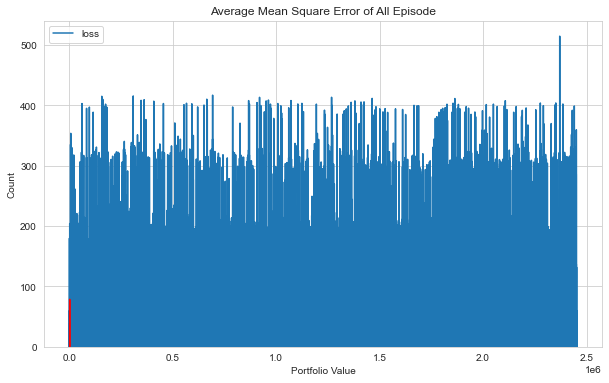

In [4]:
#train


mode = 'train'

portfolio_value = []



for e in tqdm(range(num_episodes)):
    t0 = datetime.now()
    val = play_one_episode(agent, env, mode, scaler)
    dt = datetime.now() - t0
    print(f"episode: {e + 1}/{num_episodes}, episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
    portfolio_value.append(val['portfolio_value'][-1]) 


if mode == 'train':
    # save the DQN
    agent.save(f'state_dict/{stock_name}.npz')

    # save the scaler
    with open(f'scaler/{stock_name}.pkl', 'wb') as f:
        pickle.dump(scaler, f)

    # plot losses
    loss = agent.model.losses
    losses = pd.DataFrame(loss, columns=['loss'])
    losses.plot(figsize=(10,6))
    plt.title('Average Mean Square Error of All Episode')
    plt.xlabel('Step')
    plt.ylabel('Mean Square Error')

print(f'average reward: {np.mean(portfolio_value):.2f}, min: {np.min(portfolio_value):.2f}, max: {np.max(portfolio_value):.2f}')
sns.histplot(portfolio_value, bins=100, color='r', kde=True);
plt.xlabel('Portfolio Value');
plt.ylabel('Count');

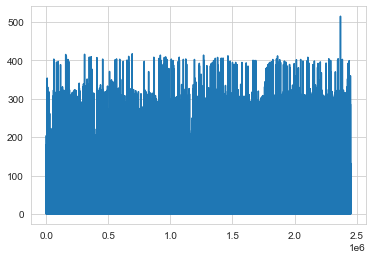

In [5]:
plt.plot(agent.model.losses)

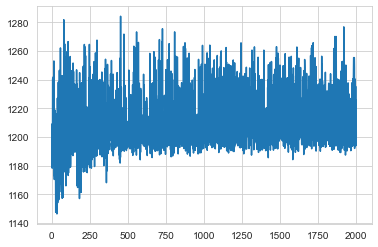

In [6]:
plt.plot(portfolio_value)

episode end value: 1129.77, duration: 0:00:00.203549
Sell: 397 times, Buy: 355 times


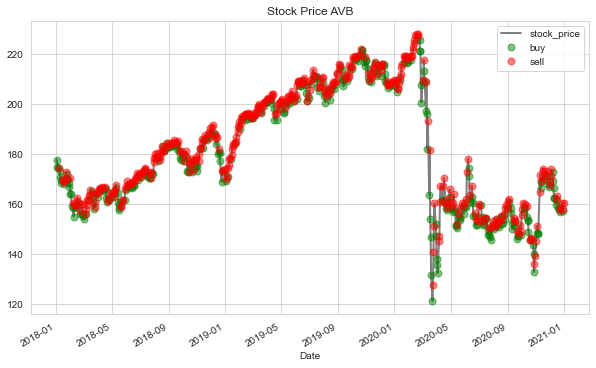

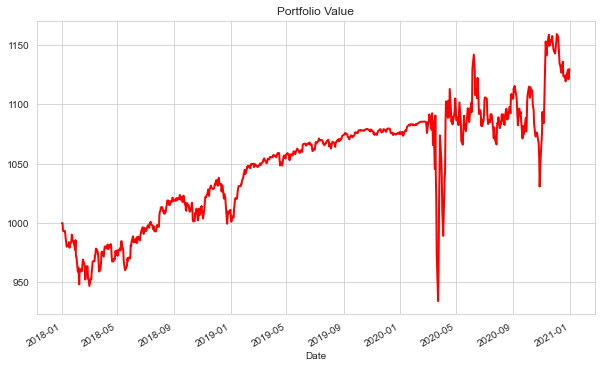

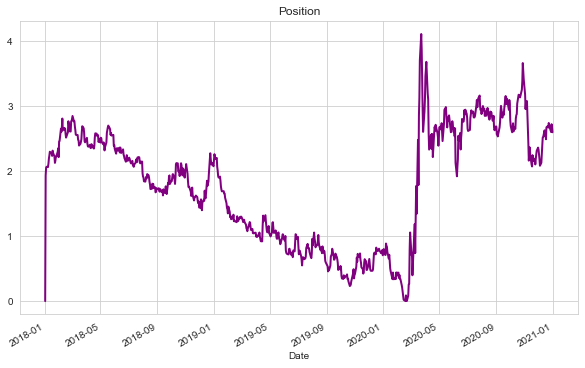

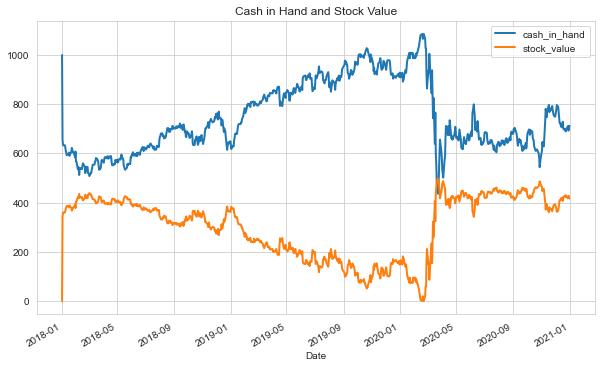

In [7]:
#test

mode = 'test'

portfolio_value = []


with open(f'scaler/{stock_name}.pkl', 'rb') as f:
    scaler = pickle.load(f)
    
env = StockEnv(test_data, capital)
agent.epsilon = 0
agent.load(f'state_dict/{stock_name}.npz')



t0 = datetime.now()
val = play_one_episode(agent, env, mode, scaler)
dt = datetime.now() - t0
print(f"episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
portfolio_value.append(val['portfolio_value'][-1])
    
print(f"Sell: {env.sell_buy.count('sell')} times, Buy: {env.sell_buy.count('buy')} times")



result = pd.DataFrame(val)
result.index = test_data.index

def marker_buy(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'buy':
        return price
    else:
        return np.nan
    
def marker_sell(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'sell':
        return price
    else:
        return np.nan
    
result['marker_buy'] = result[['stock_price', 'sell_buy']].apply(marker_buy, axis=1);
result['marker_sell'] = result[['stock_price', 'sell_buy']].apply(marker_sell, axis=1);

result['stock_price'].plot(figsize=(10,6), c='grey', lw=2);
result['marker_buy'].plot(style='o', ms=7, label='buy', c='g', alpha=0.5);
result['marker_sell'].plot(style='o', ms=7, label='sell', c='r', alpha=0.5);
plt.title('Stock Price '+ stock_name)
plt.legend();
plt.show()



result['portfolio_value'].plot(figsize=(10,6), c='r', lw=2);
plt.title('Portfolio Value');
plt.show()

result['stock_owned'].plot(figsize=(10,6), c='purple', lw=2);
plt.title('Position')
plt.show()

result[['cash_in_hand', 'stock_value']].plot(figsize=(10,6), lw=2);
plt.title('Cash in Hand and Stock Value');
plt.show()

In [8]:


def CAGR(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    n = len(df)/252
    cagr = (df['cumulative_ret'][-1])**(1/n) - 1
    return cagr

def volatility(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    vol = df['daily_ret'].std() * np.sqrt(252)
    return vol


def sharpe(DF, rf):
    df = DF.copy()
    sr = (CAGR(df) - rf)/volatility(df)
    return sr

def max_dd(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    df['cum_roll_max'] = df['cumulative_ret'].cummax()
    df['drawdown'] = df['cum_roll_max'] - df['cumulative_ret']
    df['drawdown_pct'] = df['drawdown']/df['cum_roll_max']
    max_dd = df['drawdown_pct'].max()
    return max_dd

def calmer(DF):
    df = DF.copy()
    clmr = CAGR(df)/max_dd(df)
    return clmr



print(f'Stock name: {stock_name}')
print(f'Start: {result.index[0]}  End: {result.index[-1]}')
print(f'Compound Annual Growth Rate: {CAGR(result)*100:.2f} %')
print(f'Volatility: {volatility(result):.4f}')
print(f'shape ratio: {sharpe(result, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(result)*-100:.2f} %')
print(f'Calmar ratio: {calmer(result):.4f}')
print('-----------------------------------------------------------')
print('-----------------------------------------------------------')
print('Comparing with Adj close')
print(f'Compound Annual Growth Rate (Adj close): {CAGR(test_data)*100:.2f} %')
print(f'Volatility (benchmark): {volatility(test_data):.4f}')
print(f'shape ratio: {sharpe(test_data, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(test_data)*-100:.2f} %')
print(f'Calmar ratio (benchmark): {calmer(test_data):.4f}')

Stock name: AVB
Start: 2018-01-02 00:00:00  End: 2020-12-31 00:00:00
Compound Annual Growth Rate: 4.15 %
Volatility: 0.1180
shape ratio: 0.2585
Maximun drawdown: -14.48 %
Calmar ratio: 0.2866
-----------------------------------------------------------
-----------------------------------------------------------
Comparing with Adj close
Compound Annual Growth Rate (Adj close): -3.27 %
Volatility (benchmark): 0.3214
shape ratio: -0.1359
Maximun drawdown: -46.91 %
Calmar ratio (benchmark): -0.0696


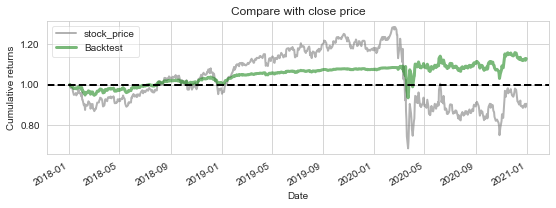

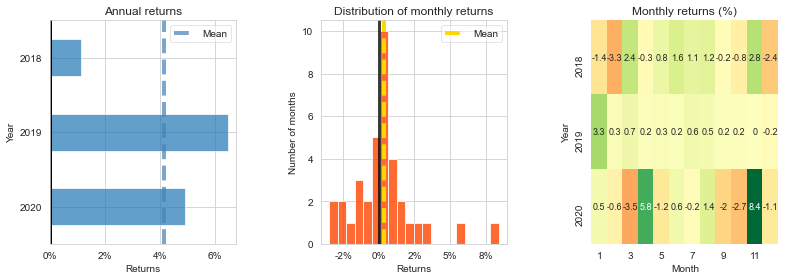

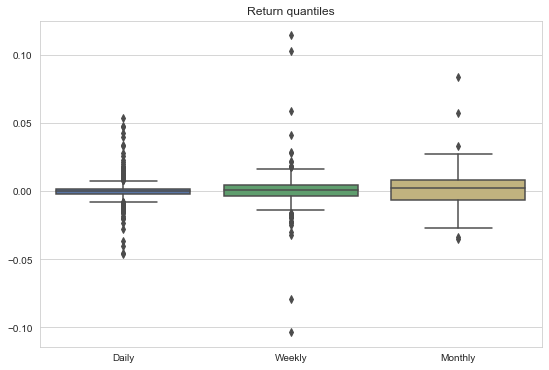

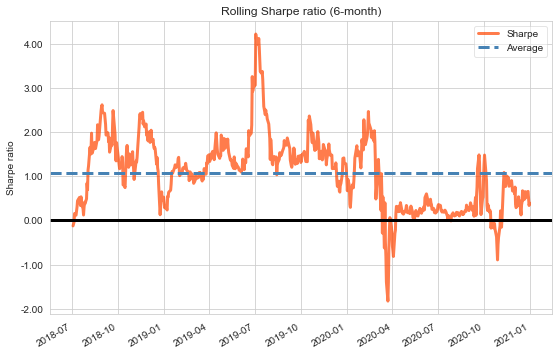

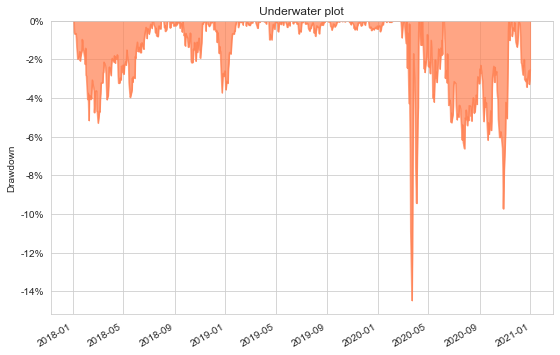

In [9]:


bt_returns = result['portfolio_value'].pct_change()
price = result['stock_price'].pct_change()



plt.figure(figsize=(9,6));
plt.subplot(2,1,1);
pf.plotting.plot_rolling_returns(bt_returns, price);
plt.title('Compare with close price');
plt.show()

fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_annual_returns(bt_returns)
plt.subplot(1,3,2)
pf.plot_monthly_returns_dist(bt_returns)
plt.subplot(1,3,3)
pf.plot_monthly_returns_heatmap(bt_returns)
plt.tight_layout()
fig.set_size_inches(12,4)

plt.figure(figsize=(9,6))
pf.plot_return_quantiles(bt_returns);



plt.figure(figsize=(9,6))
pf.plot_rolling_sharpe(bt_returns);

plt.figure(figsize=(9,6))
pf.plot_drawdown_underwater(bt_returns);

score = (sharpe(result, 0.011) - sharpe(test_data, 0.011))*10
ret = ((result['portfolio_value'][-1] - result['portfolio_value'][0])/result['portfolio_value'][0]) * 100
with open(f'score/{stock_name}.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([stock_name, industry,score, ret], f)
    
    
result.to_csv(f'../data/{stock_name}.csv')